# Name :   Mann Dsylva
# Rollno : 24MAI009
Practical 2


MLP (Multilayer Perceptron) for XOR gate

In [2]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# def tanh(x):
#     return np.tanh(x)

# def tanh_derivative(x):
#     return 1 - np.tanh(x)**2

# def relu(x):
#     return np.maximum(0, x)

# def relu_derivative(x):
#     return np.where(x > 0, 1, 0)
    
# def softmax(x):
#     exp_x = np.exp(x - np.max(x))  # Subtracting max for numerical stability
#     return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# def softmax_derivative(x):
#     s = softmax(x)
#     return s * (1 - s)

# Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training the MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)

        # Initialize biases
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

        self.weight1_history=[]
        self.weight2_history=[]

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        output = sigmoid(self.output_input)
        return output

    def backward(self, X, y, output, learning_rate):
        # Backward pass

        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        loss_history=[]

        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

            loss = mse_loss(y, output)
            loss_history.append(loss)

            self.weight1_history.append(self.weights_input_hidden.copy())
            self.weight2_history.append(self.weights_hidden_output.copy())
            # Calculate and print loss
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        return loss_history

    def predict(self, X):
        return self.forward(X)

Epoch 0, Loss: 0.27450232709728173
Epoch 100, Loss: 0.2491750876912035
Epoch 200, Loss: 0.24838851162853712
Epoch 300, Loss: 0.24676634160052593
Epoch 400, Loss: 0.24344642703692698
Epoch 500, Loss: 0.23726415396301084
Epoch 600, Loss: 0.22719388759663645
Epoch 700, Loss: 0.2135048245672327
Epoch 800, Loss: 0.19856325205364284
Epoch 900, Loss: 0.18402541582440715
Epoch 1000, Loss: 0.1682531903415788
Epoch 1100, Loss: 0.14578458123921165
Epoch 1200, Loss: 0.11140781826270836
Epoch 1300, Loss: 0.07373243535000198
Epoch 1400, Loss: 0.046920422443514596
Epoch 1500, Loss: 0.03143794877850237
Epoch 1600, Loss: 0.02256349597362963
Epoch 1700, Loss: 0.017158496672108906
Epoch 1800, Loss: 0.013639435338781106
Epoch 1900, Loss: 0.011213014913353147
Epoch 2000, Loss: 0.009460104931622016
Epoch 2100, Loss: 0.008145183885670199
Epoch 2200, Loss: 0.0071281648715634
Epoch 2300, Loss: 0.0063215048109380575
Epoch 2400, Loss: 0.005668134595238197
Epoch 2500, Loss: 0.005129483048914219
Epoch 2600, Loss: 

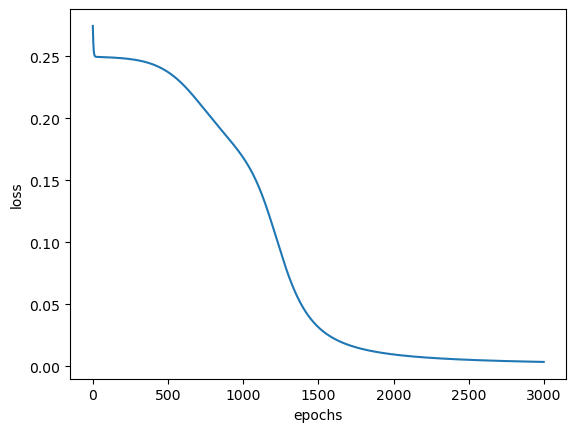

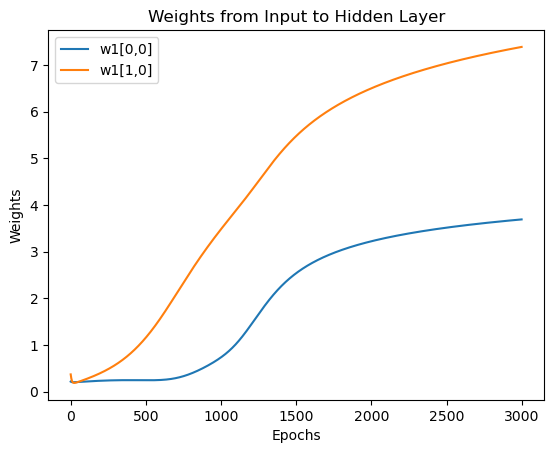

In [4]:
import matplotlib.pyplot as plt

# Data
X = np.array([[1,1], [1,0], [0,0], [0,1]])
y = np.array([[0], [1], [0], [1]])  # XOR problem

# Initialize MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1)

    # Train the MLP
loss_history=mlp.train(X, y, epochs=3000, learning_rate=0.3)
plt.plot(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
#weights graph
plt.plot(np.array(mlp.weight1_history)[:, 0, 0], label='w1[0,0]')
plt.plot(np.array(mlp.weight2_history)[:, 1, 0], label='w1[1,0]')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.title('Weights from Input to Hidden Layer')
plt.legend()
plt.show()

In [7]:
#Make predictions

F=np.array([[1,0]])
predictions = mlp.predict(F)
print("Predictions:",predictions)

Predictions: [[0.94366989]]
